In [120]:
import pyfolio
import pandas as pd

import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline

In [187]:
start_test = '2017-01-11'
end_test = '2020-09-29'

In [188]:
ndq = pd.read_csv('../bitcoinOHLC_from_2017.csv')

In [189]:
ndq.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1391,1391,"Jan 05, 2017","1,156.73","1,191.10",910.42,"1,013.38","510,199,008"
1392,1392,"Jan 04, 2017","1,044.40","1,159.42","1,044.40","1,154.73","344,945,984"
1393,1393,"Jan 03, 2017","1,021.60","1,044.08","1,021.60","1,043.84","185,168,000"
1394,1394,"Jan 02, 2017",998.62,"1,031.39",996.70,"1,021.75","222,184,992"
1395,1395,"Jan 01, 2017",963.66,"1,003.08",958.70,998.33,"147,775,008"


In [191]:
ndq['Close'] = ndq['Close'].apply(lambda x: float(x.replace(',','')))
ndq['daily_return']=ndq['Close'].pct_change(1)

In [194]:
ndq['datadate'] = pd.to_datetime(ndq['Date'])

In [196]:
ndq.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,daily_return,datadate
0,0,"Oct 27, 2020","13,075.24","13,759.67","13,060.84",13654.22,"33,749,878,156",NaN,2020-10-27
1,1,"Oct 26, 2020","13,031.20","13,225.30","12,822.38",13075.25,"29,461,458,313",-0.042402,2020-10-26
2,2,"Oct 25, 2020","13,108.06","13,329.18","12,910.06",13031.17,"24,406,920,575",-0.003371,2020-10-25
3,3,"Oct 24, 2020","12,931.57","13,145.07","12,885.75",13108.06,"24,542,317,940",0.005900,2020-10-24
4,4,"Oct 23, 2020","12,971.55","13,015.96","12,752.65",12931.54,"28,974,975,003",-0.013467,2020-10-23


In [197]:
ndq = ndq[(ndq['datadate'] > start_test) & (ndq['datadate'] < end_test)]

In [198]:
nas_strat = backtest_strat(ndq)

In [199]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [200]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['datadate'] = pd.to_datetime(strategy_ret['datadate'])
    strategy_ret.set_index('datadate', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['datadate']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [201]:
def get_account_value(model_name):
    # Simule edilmiş dönemleri toplayıp çekip birleştiriyo
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [92]:
# Strategy

df = pd.read_csv('../all_30_stocks-2005-2020.csv')

In [151]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.Date > start_test)&(df.Date <= end_test)].Date.unique()

In [152]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [202]:
ensemble_account_value = get_account_value('ensemble')


1.0577209954128004


In [203]:
ensemble_account_value.head()

,account_value,datadate
0,1.000000e+06,2016-04-13
1,9.919511e+05,2016-04-14
2,1.000037e+06,2016-04-15
3,9.784193e+05,2016-04-18
4,1.005100e+06,2016-04-19


In [163]:
plt.figure(figsize=(12,10))
#

#plt.plot(ensemble_account_value['datadate'],ensemble_account_value['account_value'])
#plt.set_xticklabels(ensemble_account_value.index,rotation=90)

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

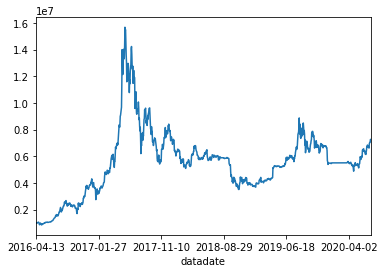

In [164]:
ensemble_account_value.set_index('datadate').account_value.plot()

In [165]:
ensemble_account_value = get_daily_return(ensemble_account_value)


Sharpe:  1.0577209954128004


In [184]:
ensemble_account_value.head()

,account_value,datadate,daily_return
0,1.000000e+06,2016-04-13,NaN
1,9.919511e+05,2016-04-14,-0.008049
2,1.000037e+06,2016-04-15,0.008152
3,9.784193e+05,2016-04-18,-0.021617
4,1.005100e+06,2016-04-19,0.027269


In [185]:
ensemble_account_value.tail()

,account_value,datadate,daily_return
1066,7.010952e+06,2020-07-08,0.012018
1067,7.060166e+06,2020-07-09,0.007020
1068,7.111330e+06,2020-07-10,0.007247
1069,7.265929e+06,2020-07-13,0.021740
1070,7.101450e+06,2020-07-14,-0.022637


In [167]:
ensemble_strat = backtest_strat(ensemble_account_value)

Start date,2020-10-27
End date,2017-01-01
Total months,66
,Backtest
Annual return,11.8%
Cumulative returns,85.7%
Annual volatility,59.9%
Sharpe ratio,0.59
Calmar ratio,0.15
Stability,0.04
Max drawdown,-77.6%


C:\Users\kaanb\Anaconda3\envs\nlpfast\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,77.62,2018-11-07,2017-05-31,2017-02-02,0
1,44.99,2020-04-25,2019-08-16,2019-04-16,0
2,31.69,2017-01-14,2017-01-04,NaT,NaN
3,17.20,2019-01-29,2018-11-14,2018-11-08,0
4,10.39,2017-01-26,2017-01-23,2017-01-20,0


C:\Users\kaanb\Anaconda3\envs\nlpfast\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Stress Events,mean,min,max
New Normal,0.26%,-19.42%,23.86%


KeyError: 'New Normal'

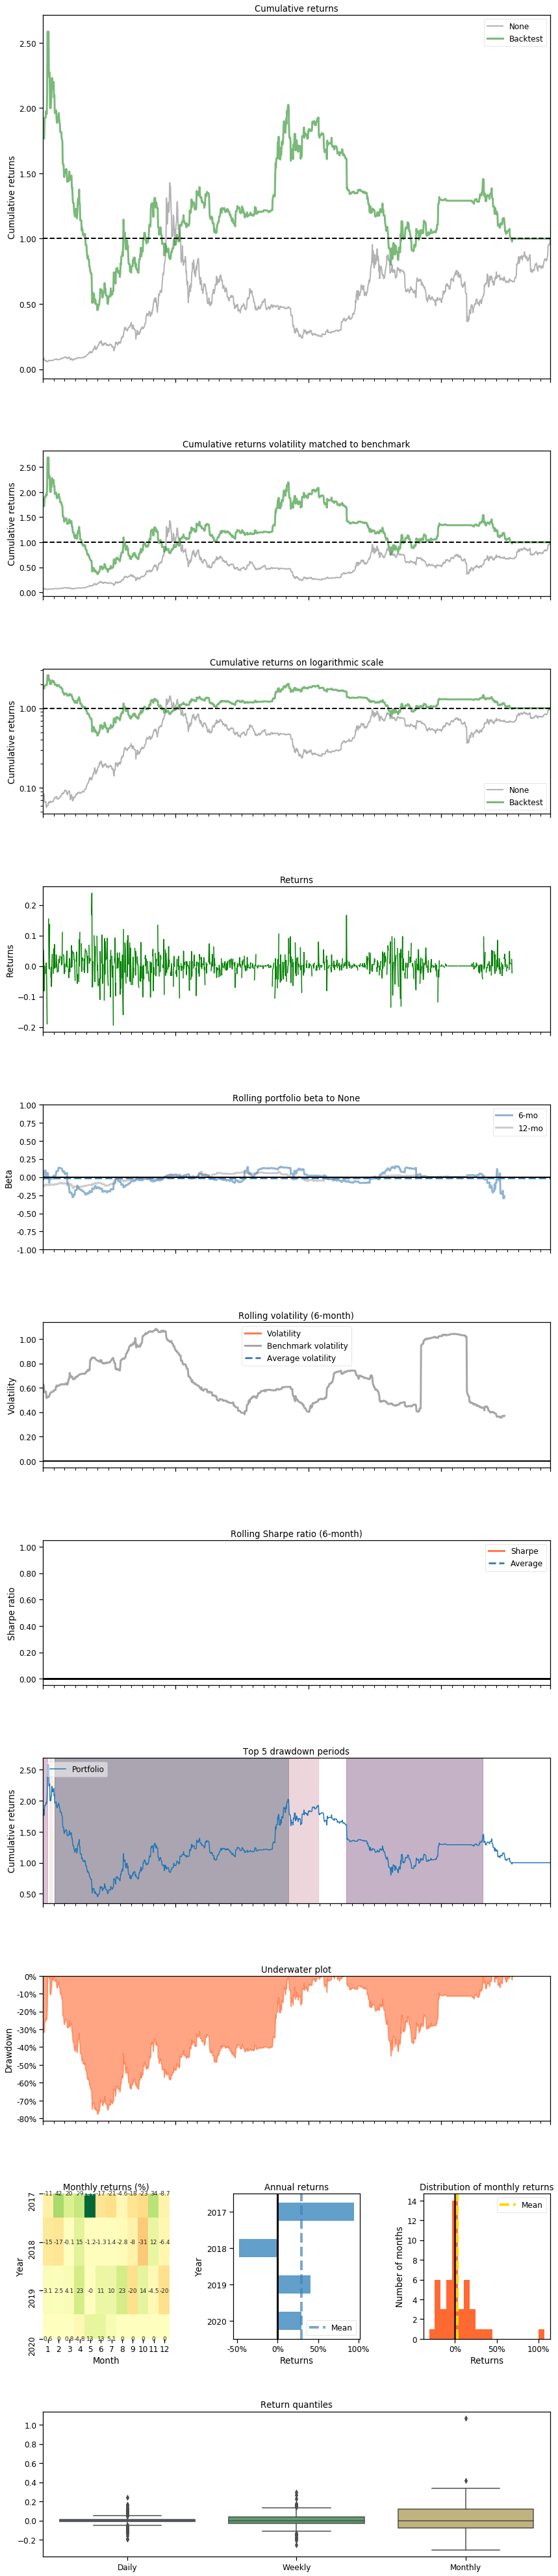

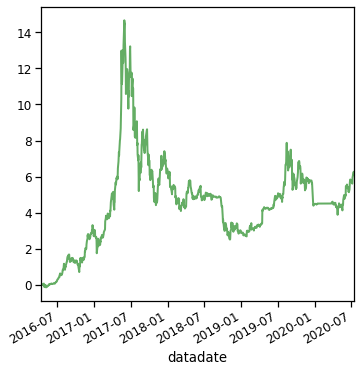

In [186]:

with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=nas_strat, set_context=False)